In [3]:
import pandas as pd
import numpy as np

#INTRO:

#Buscamos ver si existe alguna relacion entre la duracion del proyecto y la probabilidad de exito.


data = pd.read_csv("Entrenamieto_ECI_2020.csv")
columns = ['Opportunity_Created_Date', 'Last_Modified_Date', 'Stage']

df = data.loc[:, columns]
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])

df['Opportunity_Duration'] = (df['Last_Modified_Date'] - df['Opportunity_Created_Date']) / np.timedelta64(1, 'D')

df.Stage = (df.Stage == 'Closed Won').astype(int)

df = df.groupby('Opportunity_Duration')\
       .agg({'Stage' : ['mean', 'count']})\
       .reset_index()

df.columns = ['Opportunity_Duration', 'Closed_Won_mean', 'Closed_Won_number']

df = df.loc[df.Closed_Won_number > 10]

df.head(3)

,Opportunity_Duration,Closed_Won_mean,Closed_Won_number
0,0.0,0.920415,578
1,1.0,0.944812,453
2,2.0,0.811765,170


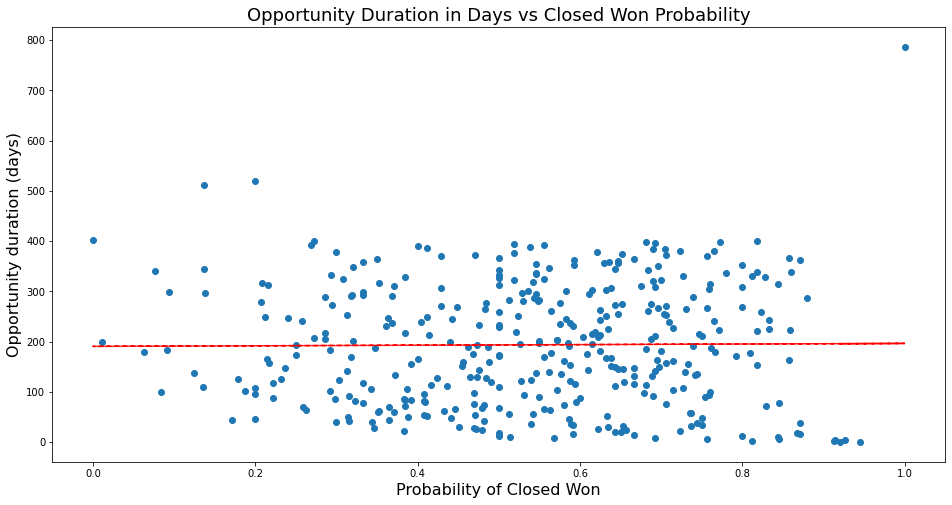

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

x = df.Closed_Won_mean.tolist()
y = df.Opportunity_Duration.tolist()

plt.figure(figsize=(16, 8))

plt.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.title("Opportunity Duration in Days vs Closed Won Probability", fontdict={'size' : 18})
plt.xlabel("Probability of Closed Won", fontdict={'size' : 16})
plt.ylabel("Opportunity duration (days)", fontdict={'size' : 16})

plt.show()

In [5]:
#No se aprecia ninguna correlacion entre los parametros estudiados.
#Si se aprecia del esquema que la media de duracion se encuentra en toron a los 200 dias.